# Random Forest – Credit Card Fraud Detection

This notebook applies a Random Forest classifier to improve fraud detection performance and reduce false negatives compared to Logistic Regression and Decision Tree.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [3]:
credit_card_data= pd.read_csv("creditcard.csv")

X = credit_card_data.drop("Class", axis=1)
y = credit_card_data["Class"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [6]:
rf_classifier=RandomForestClassifier(n_estimators=100,class_weight="balanced",random_state=42,n_jobs=-1)

In [8]:
rf_classifier.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred=rf_classifier.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[56861     3]
 [   25    73]]


In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



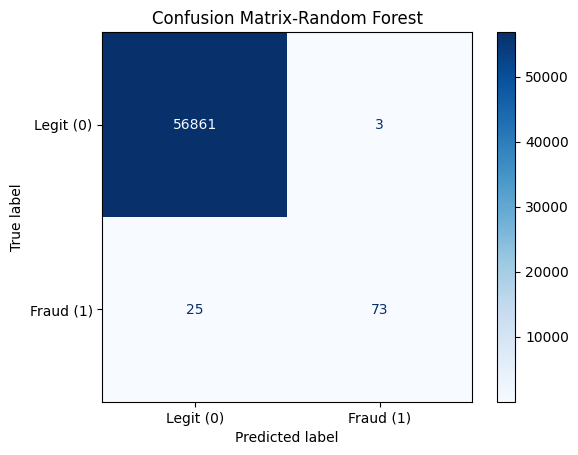

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit (0)', 'Fraud (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix-Random Forest')
plt.show()

In [20]:
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9529075998013161


<h2 style="color:darkblue;">Random Forest – Model Summary</h2>

<p style="color:green;"><b>Model Overview:</b></p>
<p>
A Random Forest classifier was applied to the original imbalanced dataset using class weighting
to address class imbalance.
</p>

<p style="color:green;"><b>Key Observation:</b></p>
<ul>
  <li>
    The model resulted in
    <b>False Negatives (FN)</b> =
    <span style="color:red;"><b>25</b></span>,
    indicating that some fraudulent transactions were not detected.
  </li>
</ul>

<p style="color:darkred;"><b>Interpretation:</b></p>
<p>
Although Random Forest is a robust ensemble method, the model exhibited conservative behavior in
fraud detection, leading to missed fraudulent cases. This highlights the importance of evaluating
models based on recall and false negatives in imbalanced classification problems.
</p>


                                                       ***THE END***